*   REVANTH SAI BOMMA
*   1/23/SET/BCS/417
*   6AIMLB1
*   DATE: 19/02/2026
*   EXPERIMENT: 05



MULTI CLASS CLASSIFICATION

HEAD:
    Delay_from_due_date  Num_of_Delayed_Payment  Num_Credit_Inquiries  \
0                  3.0                     7.0                   4.0   
1                  3.0                     7.0                   4.0   
2                  3.0                     7.0                   4.0   
3                  5.0                     4.0                   4.0   
4                  6.0                     4.0                   4.0   

   Credit_Utilization_Ratio  Credit_History_Age Payment_of_Min_Amount  \
0                 26.822620               265.0                    No   
1                 31.944960               265.0                    No   
2                 28.609352               267.0                    No   
3                 31.377862               268.0                    No   
4                 24.797347               269.0                    No   

   Amount_invested_monthly  Monthly_Balance Credit_Score Credit_Mix  ...  \
0                80.415295       312.494089  

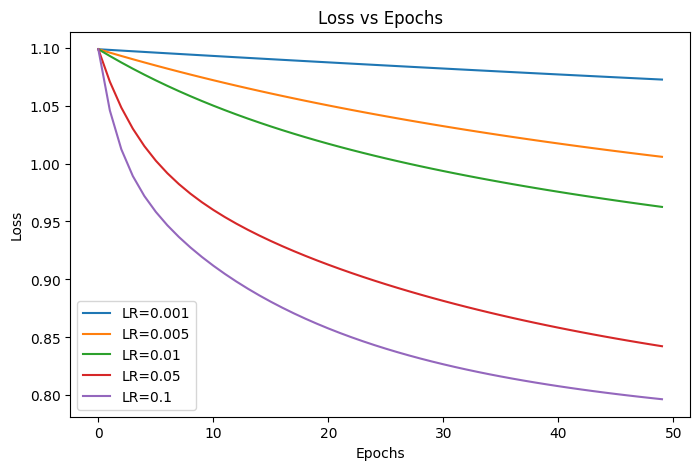

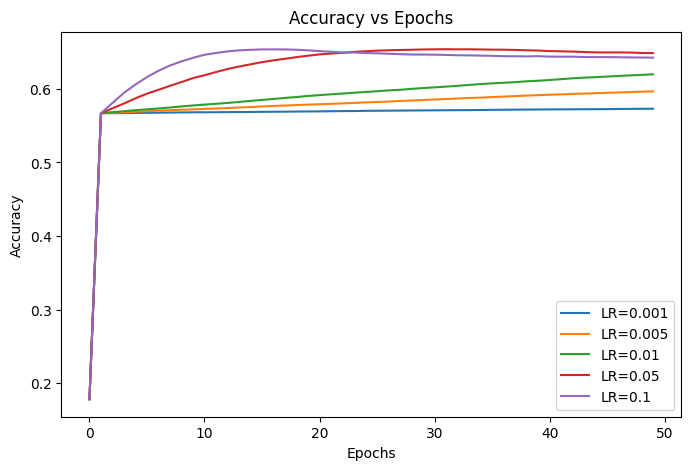

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# =========================
# 1. LOAD DATASET
# =========================
df = pd.read_csv("/content/sample_data/Score.csv")

print("HEAD:\n", df.head())
print("\nTAIL:\n", df.tail())

# =========================
# 2. CLEAN DATA
# =========================
df.dropna(inplace=True)

# Target
y = df['Credit_Score']

# Features
X = df.drop(columns=['Credit_Score'])

# =========================
# 3. ENCODE CATEGORICAL COLUMNS
# =========================
categorical_cols = X.select_dtypes(include=['object']).columns

for col in categorical_cols:
    X[col] = pd.factorize(X[col])[0]

# Encode labels
y = pd.factorize(y)[0]

# =========================
# 4. NORMALIZATION
# =========================
X = (X - X.mean()) / (X.std() + 1e-9)

X = X.values
y = y

# =========================
# 5. TRAIN TEST SPLIT
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# =========================
# 6. ONE HOT ENCODING
# =========================
num_classes = len(np.unique(y_train))

def one_hot(y, c):
    oh = np.zeros((len(y), c))
    oh[np.arange(len(y)), y] = 1
    return oh

Y_train = one_hot(y_train, num_classes)
Y_test = one_hot(y_test, num_classes)

# =========================
# 7. SOFTMAX
# =========================
def softmax(z):
    exp = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

# =========================
# 8. TRAIN FUNCTION
# =========================
def train_model(lr, epochs):

    W = np.zeros((X_train.shape[1], num_classes))
    b = np.zeros((1, num_classes))

    loss_hist = []
    acc_hist = []

    for epoch in range(epochs):

        # Forward
        logits = np.dot(X_train, W) + b
        probs = softmax(logits)

        # Loss
        loss = -np.mean(np.sum(Y_train*np.log(probs+1e-9), axis=1))

        # Gradient
        dW = np.dot(X_train.T, (probs - Y_train)) / len(X_train)
        db = np.mean(probs - Y_train, axis=0, keepdims=True)

        # Update
        W -= lr * dW
        b -= lr * db

        # Accuracy
        preds = np.argmax(probs, axis=1)
        acc = accuracy_score(y_train, preds)

        loss_hist.append(loss)
        acc_hist.append(acc)

    return W,b,loss_hist,acc_hist

# =========================
# 9. TRAIN MULTIPLE LEARNING RATES
# =========================
learning_rates = [0.001,0.005,0.01,0.05,0.1]
epochs = 50

all_losses = {}
all_accs = {}
models = {}

for lr in learning_rates:
    W,b,loss,acc = train_model(lr,epochs)
    all_losses[lr]=loss
    all_accs[lr]=acc
    models[lr]=(W,b)
    print(f"Training completed for LR={lr}")

# =========================
# 10. TEST BEST MODEL
# =========================
best_lr = 0.01
W,b = models[best_lr]

test_probs = softmax(np.dot(X_test,W)+b)
test_preds = np.argmax(test_probs, axis=1)

print("\nFINAL TEST RESULTS")
print("Accuracy :", accuracy_score(y_test,test_preds))
print("Precision:", precision_score(y_test,test_preds, average='macro'))
print("Recall   :", recall_score(y_test,test_preds, average='macro'))
print("F1 Score :", f1_score(y_test,test_preds, average='macro'))

# =========================
# 11. LOSS GRAPH
# =========================
plt.figure(figsize=(8,5))
for lr in learning_rates:
    plt.plot(all_losses[lr], label=f"LR={lr}")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# =========================
# 12. ACCURACY GRAPH
# =========================
plt.figure(figsize=(8,5))
for lr in learning_rates:
    plt.plot(all_accs[lr], label=f"LR={lr}")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


XOR CLASSIFICATION

In [3]:
import numpy as np

# ==============================
# 1. XOR Dataset
# ==============================
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y = np.array([[0],[1],[1],[0]])

# ==============================
# 2. Activation Functions
# ==============================
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return x*(1-x)

# ==============================
# 3. Network Architecture
# ==============================
np.random.seed(42)

input_neurons = 2
hidden_neurons = 4   # >= 2 needed for XOR
output_neurons = 1

# weights initialization
W1 = np.random.uniform(size=(input_neurons, hidden_neurons))
b1 = np.random.uniform(size=(1, hidden_neurons))

W2 = np.random.uniform(size=(hidden_neurons, output_neurons))
b2 = np.random.uniform(size=(1, output_neurons))

learning_rate = 0.1
epochs = 10000

# ==============================
# 4. Training
# ==============================
converged_epoch = None

for epoch in range(epochs):

    # ----- Forward Pass -----
    hidden_input = np.dot(X, W1) + b1
    hidden_output = sigmoid(hidden_input)

    final_input = np.dot(hidden_output, W2) + b2
    predicted_output = sigmoid(final_input)

    # ----- Error -----
    error = y - predicted_output

    # ----- Backpropagation -----
    d_output = error * sigmoid_derivative(predicted_output)

    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_output)

    # ----- Update weights -----
    W2 += hidden_output.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate

    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # ----- Check convergence -----
    rounded = np.round(predicted_output)

    if np.array_equal(rounded, y):
        converged_epoch = epoch
        print(f"\n🎯 Network converged at epoch: {epoch}")
        break

    # Print loss occasionally
    if epoch % 1000 == 0:
        loss = np.mean(np.square(error))
        print(f"Epoch {epoch} Loss: {loss:.6f}")

# If not converged
if converged_epoch is None:
    print("\n⚠ Network did NOT fully converge within given epochs")

# ==============================
# 5. Testing the Model
# ==============================
print("\nFinal Predictions:\n")

for i in range(len(X)):
    hidden = sigmoid(np.dot(X[i], W1) + b1)
    output = sigmoid(np.dot(hidden, W2) + b2)
    print(f"Input: {X[i]}  Predicted: {output[0][0]:.4f}  Rounded: {round(output[0][0])}")


Epoch 0 Loss: 0.332183
Epoch 1000 Loss: 0.249044
Epoch 2000 Loss: 0.244445
Epoch 3000 Loss: 0.218039
Epoch 4000 Loss: 0.156119

🎯 Network converged at epoch: 4213

Final Predictions:

Input: [0 0]  Predicted: 0.1915  Rounded: 0
Input: [0 1]  Predicted: 0.7476  Rounded: 1
Input: [1 0]  Predicted: 0.5583  Rounded: 1
Input: [1 1]  Predicted: 0.4997  Rounded: 0
